In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### 1. Dataset
Load the prostate dataset. 

In [2]:
#TODO 
train = pd.read_csv("D:/Saarland University/EML/assignment 3/a3_programming/data/prostate_train.csv") 
test = pd.read_csv("D:/Saarland University/EML/assignment 3/a3_programming/data/prostate_test.csv") 

We will use the target $y=$lpsa throughout this exercise, and all other features as predictors $X$, so split the train and test sets by $X,y$.

In [3]:
#TODO
Xtrain, ytrain = train.drop(columns='lpsa'),train['lpsa']
Xtest, ytest = test.drop(columns='lpsa'),test['lpsa']

### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different regularization parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

Text(0.5, 1.0, 'coefficient values v/s λ')

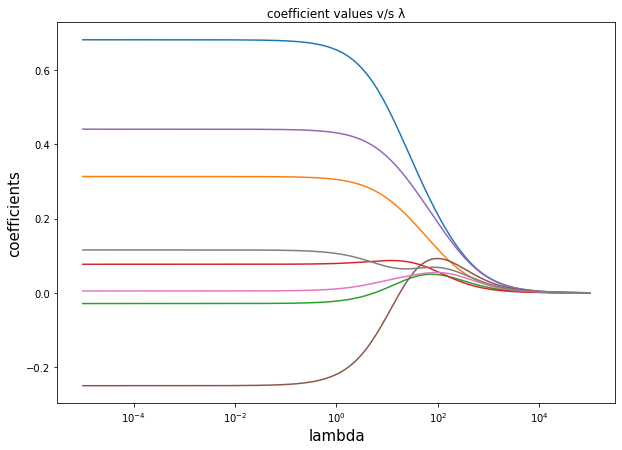

In [4]:
from sklearn.linear_model import Ridge  
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)
coef=[]

#TODO
for lam in lambdas:
    model = Ridge(alpha=lam)
    model.fit(Xtrain, ytrain)
    coef.append(model.coef_)
plt.figure(figsize=(10,7))
ax=plt.subplot()
ax.plot(lambdas,coef)
ax.set_xscale("log")
ax.set_xlabel('lambda',fontsize=15)
ax.set_ylabel('coefficients',fontsize=15)
ax.set_title('coefficient values v/s λ')

### Observation:
 we observe that as the lambda value increases the coefficient value significantly reduces and beyond certain point it touches zero. We also see increment at values of certain coefficients towards the end which is where the model tries to balance between its high coefficient parameters and increasing Lambda value where it tries to depend on other variables as well.

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
# K-fold cross validation
folds = 10

#TODO
trainMSE=0
testMSE=100000
optLam=0
modelcoef=[]
splits = KFold(n_splits=folds)
splits.get_n_splits(Xtrain)
for lam in lambdas:
    Trm=[]
    Tem=[]
    model = Ridge(alpha=lam)
    for i, (train_index, test_index) in enumerate(splits.split(Xtrain)):
        model.fit(Xtrain.loc[train_index], ytrain.loc[train_index])
        Trm.append(mse(model.predict(Xtrain.loc[train_index]),ytrain.loc[train_index]))
        Tem.append(mse(model.predict(Xtrain.loc[test_index]),ytrain.loc[test_index]))
    print('lambda:',lam)
    print('avg test mse:',sum(Tem)/folds)
    if testMSE>(sum(Tem)/folds): # the optimal lambda value is choosen taking into consideration the lowest test MSE.
        trainMSE=sum(Trm)/folds
        testMSE=sum(Tem)/folds
        optLam=lam
        modelcoef=model.coef_

lambda: 1e-05
avg test mse: 0.7635521286796523
lambda: 1.1226677735108135e-05
avg test mse: 0.7635521213569301
lambda: 1.2603829296797274e-05
avg test mse: 0.7635521131359516
lambda: 1.414991297434576e-05
avg test mse: 0.7635521039065316
lambda: 1.588565129428053e-05
avg test mse: 0.7635520935449688
lambda: 1.7834308769319092e-05
avg test mse: 0.7635520819123881
lambda: 2.0022003718155845e-05
avg test mse: 0.7635520688528803
lambda: 2.2478058335487252e-05
avg test mse: 0.763552054191411
lambda: 2.523539170434766e-05
avg test mse: 0.7635520377314761
lambda: 2.833096101839324e-05
avg test mse: 0.7635520192524679
lambda: 3.180625692794119e-05
avg test mse: 0.7635519985067194
lambda: 3.5707859649004625e-05
avg test mse: 0.763551975216185
lambda: 4.008806328898465e-05
avg test mse: 0.7635519490687139
lambda: 4.5005576757004976e-05
avg test mse: 0.7635519197138678
lambda: 5.0526310653356795e-05
avg test mse: 0.763551886758225
lambda: 5.672426068491978e-05
avg test mse: 0.76355184976011
lambd

lambda: 68.26071834272393
avg test mse: 0.87649787319813
lambda: 76.63410868007462
avg test mse: 0.8899083559147026
lambda: 86.0346441668451
avg test mse: 0.9043303442658791
lambda: 96.58832241158709
avg test mse: 0.9197809002669345
lambda: 108.43659686896109
avg test mse: 0.9362625356237851
lambda: 121.7382727739662
avg test mse: 0.9537605278883182
lambda: 136.67163564620074
avg test mse: 0.9722406156116937
lambda: 153.43684089300132
avg test mse: 0.9916473112001667
lambda: 172.25859653987874
avg test mse: 1.0119030621874325
lambda: 193.38917504552322
avg test mse: 1.0329084504118096
lambda: 217.11179456945052
avg test mse: 1.0545435444928746
lambda: 243.74441501222216
avg test mse: 1.0766704212266143
lambda: 273.6439997074672
avg test mse: 1.0991367592087564
lambda: 307.21129988617594
avg test mse: 1.1217802998017032
lambda: 344.896226040576
avg test mse: 1.1444338831637122
lambda: 387.20387818125573
avg test mse: 1.1669307136315263
lambda: 434.7013158125026
avg test mse: 1.189109496

Report train and test error measured in MSE for this $\lambda$.

In [11]:
print("The train and test MSE for the optimal lambda= "+str(optLam)+" are:")
print('Train MSE: \n', trainMSE)
print('Test MSE: \n',testMSE)
print('model coefficients: \n',modelcoef)

The train and test MSE for the optimal lambda= 3.3700643292719317 are:
Train MSE: 
 0.4660303041336637
Test MSE: 
 0.7557008236293987
model coefficients: 
 [ 0.60866153  0.29686135 -0.07401726  0.04732722  0.37739841 -0.22935105
 -0.00632722  0.17855967]


### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

Text(0.5, 1.0, 'coefficient values v/s λ')

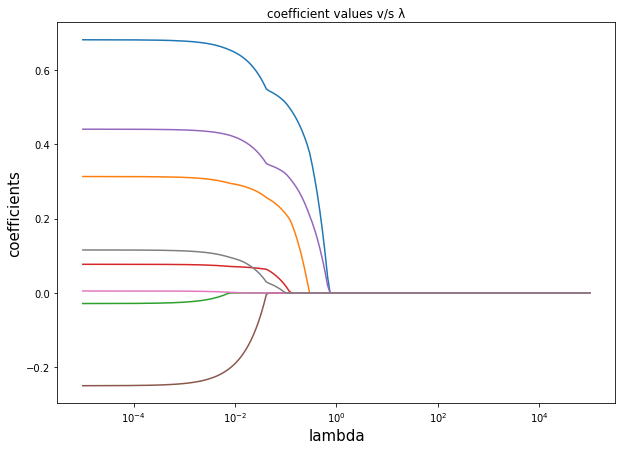

In [12]:
from sklearn.linear_model import Lasso
lambdas = np.logspace(-5, 5, 200)
coef=[]
#TODO
for lam in lambdas:
    model = Lasso(alpha=lam)
    model.fit(Xtrain, ytrain)
    coef.append(model.coef_)
plt.figure(figsize=(10,7))
ax=plt.subplot()
ax.plot(lambdas,coef)
ax.set_xscale("log")
ax.set_xlabel('lambda',fontsize=15)
ax.set_ylabel('coefficients',fontsize=15)
ax.set_title('coefficient values v/s λ')

### Observation:
Compared to the figure from part 2 we see the following two observations:

1. Unlike ridge regression in Lasso the model produce can involve any number of variable for a given value of lambda. Ridge regression on the other hand involves all the variables in the model.

2. The coefficients assigned corresponding to a variable is still dependent on lambda in both cases where as lambda increases significantly the coefficients approaches zero, but in lasso the coefficient goes to zero must faster than that of ridge regression.

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
# K-fold cross validation
folds = 10

#TODO
trainMSE=0
testMSE=100000
optLam=0
modelcoef2=[]
splits = KFold(n_splits=folds)
splits.get_n_splits(Xtrain)

for lam in lambdas:
    Trm=[]
    Tem=[]
    model = Lasso(alpha=lam)
    for i, (train_index, test_index) in enumerate(splits.split(Xtrain)):
        model.fit(Xtrain.loc[train_index], ytrain.loc[train_index])
        Trm.append(mse(model.predict(Xtrain.loc[train_index]),ytrain.loc[train_index]))
        Tem.append(mse(model.predict(Xtrain.loc[test_index]),ytrain.loc[test_index]))
    print('lambda:',lam)
    print('avg test mse:',sum(Tem)/folds)
    if testMSE>(sum(Tem)/folds): # the optimal lambda value is choosen taking into consideration the lowest test MSE.
        trainMSE=sum(Trm)/folds
        testMSE=sum(Tem)/folds
        optLam=lam
        modelcoef2=model.coef_


lambda: 1e-05
avg test mse: 0.7635350064035119
lambda: 1.1226677735108135e-05
avg test mse: 0.7635329286923358
lambda: 1.2603829296797274e-05
avg test mse: 0.7635305309008763
lambda: 1.414991297434576e-05
avg test mse: 0.76352788045238
lambda: 1.588565129428053e-05
avg test mse: 0.7635249020737553
lambda: 1.7834308769319092e-05
avg test mse: 0.7635215614974762
lambda: 2.0022003718155845e-05
avg test mse: 0.7635178139407969
lambda: 2.2478058335487252e-05
avg test mse: 0.7635136145618111
lambda: 2.523539170434766e-05
avg test mse: 0.7635089085663875
lambda: 2.833096101839324e-05
avg test mse: 0.7635036373635028
lambda: 3.180625692794119e-05
avg test mse: 0.7634976981177478
lambda: 3.5707859649004625e-05
avg test mse: 0.7634909910637987
lambda: 4.008806328898465e-05
avg test mse: 0.7634835093310673
lambda: 4.5005576757004976e-05
avg test mse: 0.763475087984007
lambda: 5.0526310653356795e-05
avg test mse: 0.7634657932492878
lambda: 5.672426068491978e-05
avg test mse: 0.7634551259548352
lam

lambda: 76.63410868007462
avg test mse: 1.5041062315004239
lambda: 86.0346441668451
avg test mse: 1.5041062315004239
lambda: 96.58832241158709
avg test mse: 1.5041062315004239
lambda: 108.43659686896109
avg test mse: 1.5041062315004239
lambda: 121.7382727739662
avg test mse: 1.5041062315004239
lambda: 136.67163564620074
avg test mse: 1.5041062315004239
lambda: 153.43684089300132
avg test mse: 1.5041062315004239
lambda: 172.25859653987874
avg test mse: 1.5041062315004239
lambda: 193.38917504552322
avg test mse: 1.5041062315004239
lambda: 217.11179456945052
avg test mse: 1.5041062315004239
lambda: 243.74441501222216
avg test mse: 1.5041062315004239
lambda: 273.6439997074672
avg test mse: 1.5041062315004239
lambda: 307.21129988617594
avg test mse: 1.5041062315004239
lambda: 344.896226040576
avg test mse: 1.5041062315004239
lambda: 387.20387818125573
avg test mse: 1.5041062315004239
lambda: 434.7013158125026
avg test mse: 1.5041062315004239
lambda: 488.02515836544336
avg test mse: 1.504106

In [15]:
print("the train and test MSE for the optimal  lambda = "+str(optLam)+" are:")
print('train MSE: \n', trainMSE)
print('test MSE: \n',testMSE)
print('Lasso model coefficients: \n',modelcoef2)

the train and test MSE for the optimal  lambda = 0.018464249428955443 are:
train MSE: 
 0.4673739202415154
test MSE: 
 0.7473037042820396
Lasso model coefficients: 
 [ 0.63030991  0.28641522 -0.034611    0.02545803  0.37152739 -0.22282811
  0.          0.14702437]


In [16]:
print('Lasso model coefficients: \n',modelcoef2)
print('ridge regression model coefficient:\n',modelcoef)

Lasso model coefficients: 
 [ 0.63030991  0.28641522 -0.034611    0.02545803  0.37152739 -0.22282811
  0.          0.14702437]
ridge regression model coefficient:
 [ 0.60866153  0.29686135 -0.07401726  0.04732722  0.37739841 -0.22935105
 -0.00632722  0.17855967]


How many and which features are used?
		Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

### solution:
For the Lasso regression model it was seen that for the optimal value of 𝜆 the coefficient corresponding to the predictor "gleason" has a value of 0 which eliminates its effect entirely in the final output. So as a whole 7 out of 8 features are used in Lasso Regression.

When we compare the coefficients of Lasso regression with Ridge regression we see that the coefficients of the two methods are comparable to one another except for the fact lasso regression completely eliminates the feature "gleason" while Ridge regression offers a very low negative value as the coefficient.

## 6. 

Compare the performance, in terms of MSE, of the best models in parts 3. and 5. Which model would you choose and why? What alternative model could have been used?

### Solution:
In terms of MSE Lasso regression gives better performance as the test MSE is 0.7473 while in Ridge regression it was 0.755. Based on the performance on the test set we would go for the Lasso regression as this model generalises better. 
Since Lasso essentially results in reduction of dimensions of the input data so PCA could have been used as an alternative.